<a href="https://colab.research.google.com/github/howsam/pytorch-course-free/blob/main/week_6_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='#FFE15D'><b>💎 Week 6: Multilayer Perceptrons (MLP)</b></font>
### Pytorch Free Course [webpage](https://howsam.org/downloads/pytorch-courset/)

### Source Codes on Github [pytorch-course-free](https://github.com/howsam/pytorch-course-free.git)

### by Howsam AI Academy www.howsam.org


## ◀️ **Recap 👀**

<font size=5>✅ **Week 0**: Installation </font>

<font size=5>✅ **Week 1**: Torch as Numpy </font>

<font size=5>✅ **Week 2**: Linear Regression with Torch API </font>

<font size=5>✅ **Week 3**: Linear Regression Autograd </font>

<font size=5>✅ **Week 4**: Binary Classification </font>

<font size=5>✅ **Week 5**: Multiclass Classification </font>

In [ ]:
# Load Data
train_set = TensorDataset(X, y)
train_loader = DataLoader(train_set, batch_size=..., shuffle=True)

# Define Model
model = nn.Linear(...)

# Define Loss
loss_fn = nn...

# Define Optimizer
optimizer = optim.SGD(model.parameters(), lr=..., momentum=0.9)

# train Loop
for epoch in range(n_epochs):
  for x_batch, y_batch in train_loader:
    # model
    y_hat = model(x_batch)
    # loss
    loss = loss_fn(y_hat, y_batch)
    # gradient
    loss.backward()
    # update
    optimizer.step()
    optimizer.zero_grad()

## 🟥 **Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD

In [ ]:
torch.__version__

'2.3.1+cu121'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 🟥 **Step 1: Data**

### Binary Prediction of Poisonous Mushrooms | [kaggle](https://www.kaggle.com/competitions/playground-series-s4e8/overview) | [Google Drive](https://drive.google.com/file/d/1UYK3t54ee-9Gxa2POmygRI_kdCBkCONi/view?usp=sharing)
*Playground Series - Season 4, Episode 8*

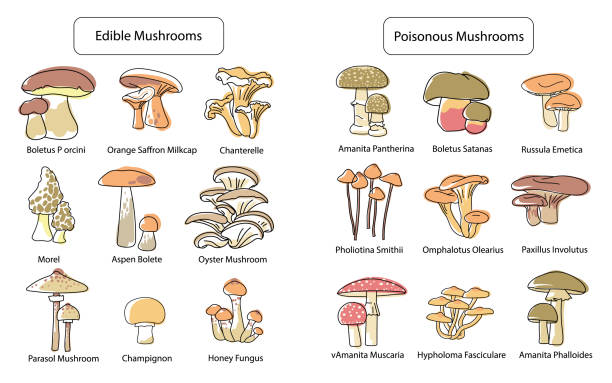

The dataset for this competition (both train and test) was generated from a deep learning model trained on the UCI Mushroom dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Note:** Unlike many previous Tabular Playground datasets, data artifacts have not been cleaned up. There are categorical values in the dataset that are not found in the original. It is up to the competitors how to handle this.

#### Files
* **train.csv** - the training dataset; class is the binary target (either e or p)
* **test.csv** - the test dataset; your objective is to predict target class for each row
* **sample_submission.csv** - a sample submission file in the correct format

In [ ]:
!mkdir /content/data

In [ ]:
!cp /content/drive/MyDrive/pytorch-free-course/data/playground-series-s4e8.zip /content/data/

In [ ]:
!unzip /content/data/playground-series-s4e8.zip -d /content/data

Archive:  /content/data/playground-series-s4e8.zip
  inflating: /content/data/sample_submission.csv  
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


In [ ]:
!rm /content/data/playground-series-s4e8.zip

### 🟧 **Load train set**

In [ ]:
df_train = pd.read_csv('data/train.csv')
df_train = df_train.drop(columns=['id'])
df_train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [ ]:
num_samples, num_features = df_train.shape
num_features -= 1
num_classes = len(np.unique(df_train['class']))
num_samples, num_features, num_classes

(3116945, 20, 2)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 499.4+ MB


In [ ]:
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=10, stratify=df_train['class'])
len(df_train), len(df_valid)

(2493556, 623389)

### 🟧 **Preprocessing**

#### 🟨 **NaN 😩**

In [ ]:
df_train.isna().mean() * 100

,0
class,0.000000
cap-diameter,0.000120
cap-shape,0.001404
cap-surface,21.524762
cap-color,0.000361
does-bruise-or-bleed,0.000281
gill-attachment,16.795693
gill-spacing,40.363080
gill-color,0.001885
stem-height,0.000000


In [ ]:
missing_threshold = 0.95

high_missing_columns = df_train.columns[df_train.isna().mean() > missing_threshold]
print(high_missing_columns)

df_train = df_train.drop(columns=high_missing_columns)
df_valid = df_valid.drop(columns=high_missing_columns)

df_train.head()

Index([], dtype='object')


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
2256566,p,3.30,c,NaN,u,f,a,c,n,3.76,...,NaN,i,u,NaN,NaN,f,f,NaN,d,a
2032804,e,3.04,s,NaN,n,f,f,f,f,5.79,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
350767,e,6.32,x,t,n,f,e,NaN,w,12.86,...,NaN,s,n,u,w,f,f,NaN,d,u
402889,e,0.97,c,g,n,t,a,NaN,p,5.14,...,NaN,NaN,n,NaN,NaN,f,f,NaN,h,u
946147,e,3.54,b,g,n,f,a,d,g,5.89,...,NaN,s,g,NaN,NaN,f,f,NaN,d,u


In [ ]:
mode_values = df_train.mode()
mode_values = mode_values.loc[0].to_dict()
mode_values['cap-diameter']

1.49

In [ ]:
median_values = df_train.median(numeric_only=True).to_dict()
median_values

{'cap-diameter': 5.75, 'stem-height': 5.88, 'stem-width': 9.65}

In [ ]:
for column in df_train.columns:

  if df_train[column].isna().any():

    if df_train[column].dtype == 'object':
      df_train[column] = df_train[column].fillna(mode_values[column])
      df_valid[column] = df_valid[column].fillna(mode_values[column])

    else:
      df_train[column] = df_train[column].fillna(median_values[column])
      df_valid[column] = df_valid[column].fillna(median_values[column])

df_train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
2256566,p,3.30,c,t,u,f,a,c,n,3.76,...,b,i,u,u,w,f,f,k,d,a
2032804,e,3.04,s,t,n,f,f,f,f,5.79,...,b,s,y,u,w,f,f,k,d,a
350767,e,6.32,x,t,n,f,e,c,w,12.86,...,b,s,n,u,w,f,f,k,d,u
402889,e,0.97,c,g,n,t,a,c,p,5.14,...,b,s,n,u,w,f,f,k,h,u
946147,e,3.54,b,g,n,f,a,d,g,5.89,...,b,s,g,u,w,f,f,k,d,u


In [ ]:
df_train.isna().mean()

,0
class,0.0
cap-diameter,0.0
cap-shape,0.0
cap-surface,0.0
cap-color,0.0
does-bruise-or-bleed,0.0
gill-attachment,0.0
gill-spacing,0.0
gill-color,0.0
stem-height,0.0


#### 🟨 **Encoding**

In [ ]:
df_train

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
2256566,p,3.30,c,t,u,f,a,c,n,3.76,...,b,i,u,u,w,f,f,k,d,a
2032804,e,3.04,s,t,n,f,f,f,f,5.79,...,b,s,y,u,w,f,f,k,d,a
350767,e,6.32,x,t,n,f,e,c,w,12.86,...,b,s,n,u,w,f,f,k,d,u
402889,e,0.97,c,g,n,t,a,c,p,5.14,...,b,s,n,u,w,f,f,k,h,u
946147,e,3.54,b,g,n,f,a,d,g,5.89,...,b,s,g,u,w,f,f,k,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449163,p,2.26,f,i,l,f,a,c,p,3.89,...,b,s,w,u,w,f,f,p,g,a
1514277,p,6.49,x,g,n,f,e,c,w,7.59,...,b,y,w,u,w,t,p,k,d,a
1734244,p,1.46,x,t,n,f,a,c,n,4.67,...,b,s,n,u,w,f,f,k,g,a
1229858,p,6.20,b,y,g,f,a,c,w,11.35,...,b,s,w,u,w,t,z,k,d,s


In [ ]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

cat_cols_train = df_train.select_dtypes(include=['object']).columns
print(cat_cols_train)

df_train[cat_cols_train] = ordinal_encoder.fit_transform(df_train[cat_cols_train].astype(str))
df_valid[cat_cols_train] = ordinal_encoder.transform(df_valid[cat_cols_train].astype(str))

df_train.head()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color',
       'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
2256566,1.0,3.30,39.0,66.0,61.0,6.0,37.0,23.0,40.0,3.76,...,11.0,40.0,47.0,19.0,21.0,3.0,14.0,14.0,21.0,0.0
2032804,0.0,3.04,56.0,66.0,52.0,6.0,44.0,28.0,30.0,5.79,...,11.0,48.0,50.0,19.0,21.0,3.0,14.0,14.0,21.0,0.0
350767,0.0,6.32,60.0,66.0,52.0,6.0,43.0,23.0,51.0,12.86,...,11.0,48.0,39.0,19.0,21.0,3.0,14.0,14.0,21.0,2.0
402889,0.0,0.97,39.0,46.0,52.0,18.0,37.0,23.0,42.0,5.14,...,11.0,48.0,39.0,19.0,21.0,3.0,14.0,14.0,26.0,2.0
946147,0.0,3.54,37.0,46.0,52.0,6.0,37.0,25.0,31.0,5.89,...,11.0,48.0,31.0,19.0,21.0,3.0,14.0,14.0,21.0,2.0


In [ ]:
df_train['cap-surface'].value_counts()

,count
cap-surface,
66.0,905331
62.0,308250
71.0,262150
47.0,227390
46.0,210792
...,...
5.0,1
18.0,1
19.0,1


#### 🟨 **Normalization ❓**

#### 🟨 **Balancing data ❓**

In [ ]:
df_train['class'].value_counts()

,count
class,
1.0,1364317
0.0,1129239


### 🟪 **Increasing the output font size in Colab cells**

In [ ]:
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 30px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [ ]:
a = 3
a

3

### 🟧 **Hitorch! 🤪**

In [ ]:
X_train = df_train.drop(['class'], axis=1).values
y_train = df_train['class'].values.reshape(-1, 1)

X_valid = df_valid.drop(['class'], axis=1).values
y_valid = df_valid['class'].values.reshape(-1, 1)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2493556, 20), (2493556, 1), (623389, 20), (623389, 1))

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

(torch.Size([2493556, 20]),
 torch.Size([2493556, 1]),
 torch.Size([623389, 20]),
 torch.Size([623389, 1]))

In [ ]:
train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)

In [ ]:
train_loader = DataLoader(train_set, batch_size=256, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=256)

In [ ]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([256, 20]), torch.Size([256, 1]))

## 🟥 **Step 2: Model**

In [ ]:
nfl1 = 4 * num_features
nfl2 = 2 * num_features

model = nn.Sequential(
    nn.Linear(num_features, nfl1),
    nn.ReLU(),
    # nn.Linear(nfl1, nfl2),
    # nn.ReLU(),
    nn.Linear(nfl1, num_classes-1),
    nn.Sigmoid()
)
model.to(device)

Sequential(
  (0): Linear(in_features=20, out_features=80, bias=True)
  (1): ReLU()
  (2): Linear(in_features=80, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
model[0].bias

Parameter containing:
tensor([-0.1333,  0.1571,  0.0924, -0.1272,  0.2007,  0.1592, -0.0938,  0.0124,
         0.0278, -0.1720, -0.0997, -0.2102,  0.0871, -0.1665, -0.1204, -0.0069,
        -0.1289,  0.0587, -0.0629,  0.1585,  0.1370, -0.2029, -0.1495, -0.0495,
         0.0144, -0.0767, -0.0628,  0.0406, -0.1391, -0.0355, -0.1748, -0.0998,
        -0.0720, -0.0311, -0.2188, -0.0963,  0.1185,  0.1486,  0.1420,  0.1048,
         0.1708, -0.1985,  0.0348,  0.0581,  0.0851, -0.0961, -0.0601, -0.0459,
        -0.0151,  0.0768, -0.0757,  0.2201,  0.0239, -0.1853, -0.1417,  0.1058,
         0.1223,  0.0684, -0.1804, -0.1994,  0.0054,  0.1707, -0.1445,  0.0640,
        -0.1050,  0.1199, -0.1787, -0.0763, -0.1626,  0.0113, -0.0783, -0.1387,
        -0.0978, -0.0517, -0.2113,  0.2076, -0.1790,  0.0846, -0.0421,  0.1448],
       device='cuda:0', requires_grad=True)

In [ ]:
model(x_batch.to(device)).shape

torch.Size([256, 1])

In [ ]:
model[0].weight.shape, model[0].bias.shape

(torch.Size([40, 20]), torch.Size([40]))

## 🟥 **Step 3: Loss**

In [ ]:
loss_fn = nn.BCELoss()
loss_fn

BCELoss()

In [ ]:
out = model(x_batch.to(device))
loss_fn(out, y_batch.to(device))

tensor(1.6959, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
a = torch.tensor([1.], device=device)
b = torch.tensor([2.])
a * b

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

## 🟥 **Step 4: Optimizer**

In [ ]:
optimizer = SGD(model.parameters(), lr=0.0001, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

## 🟥 **Step 5: Train**

In [ ]:
loss_train_hist, loss_valid_hist = [], []
acc_train_hist, acc_valid_hist = [], []
best_loss_valid = 10000

In [ ]:
n_epochs = 10

for epoch in range(n_epochs):

  mean_loss_train, mean_loss_valid = 0, 0
  mean_acc_train, mean_acc_valid = 0, 0

  for iter, (x_batch, y_batch) in enumerate(train_loader):

    # GPU!
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    # model
    y_hat = model(x_batch)

    # loss
    loss = loss_fn(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.round() == y_batch).item()

  mean_loss_train = mean_loss_train / len(train_set)
  mean_acc_train = mean_acc_train / len(train_set)

  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)


  with torch.no_grad():
    for x_batch, y_batch in valid_loader:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      y_hat = model(x_batch)
      loss = loss_fn(y_hat, y_batch)
      mean_loss_valid += loss.item() * len(x_batch)
      mean_acc_valid += torch.sum(y_hat.round() == y_batch).item()

    mean_loss_valid = mean_loss_valid / len(valid_set)
    mean_acc_valid = mean_acc_valid / len(valid_set)

    loss_valid_hist.append(mean_loss_valid)
    acc_valid_hist.append(mean_acc_valid)

  print(
  f"Epoch: {epoch}   "
  f"LossTrain: {mean_loss_train:.3}   "
  f"AccTrain: {mean_acc_train:.3}   "
  f"LossValid: {mean_loss_valid:.3}   "
  f"AccValid: {mean_acc_valid:.3}"
  )

  if mean_loss_valid < best_loss_valid:
    torch.save(model, "best-model.pt")
    best_loss_valid = mean_loss_valid
    print("Model Saved!")
    print()

Epoch: 0   LossTrain: 0.18   AccTrain: 0.944   LossValid: 0.172   AccValid: 0.948
Model Saved!

Epoch: 1   LossTrain: 0.175   AccTrain: 0.946   LossValid: 0.19   AccValid: 0.939
Epoch: 2   LossTrain: 0.169   AccTrain: 0.949   LossValid: 0.163   AccValid: 0.95
Model Saved!

Epoch: 3   LossTrain: 0.164   AccTrain: 0.951   LossValid: 0.156   AccValid: 0.955
Model Saved!

Epoch: 4   LossTrain: 0.159   AccTrain: 0.953   LossValid: 0.163   AccValid: 0.952
Epoch: 5   LossTrain: 0.155   AccTrain: 0.955   LossValid: 0.146   AccValid: 0.959
Model Saved!

Epoch: 6   LossTrain: 0.151   AccTrain: 0.956   LossValid: 0.146   AccValid: 0.958
Model Saved!

Epoch: 7   LossTrain: 0.147   AccTrain: 0.958   LossValid: 0.151   AccValid: 0.955
Epoch: 8   LossTrain: 0.144   AccTrain: 0.959   LossValid: 0.137   AccValid: 0.963
Model Saved!

Epoch: 9   LossTrain: 0.141   AccTrain: 0.961   LossValid: 0.138   AccValid: 0.961


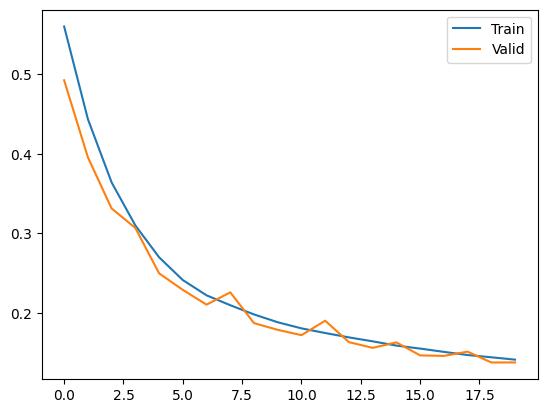

In [ ]:
n = len(loss_train_hist)

plt.plot(torch.arange(n), loss_train_hist)
plt.plot(torch.arange(n), loss_valid_hist)
plt.legend(["Train", "Valid"]);

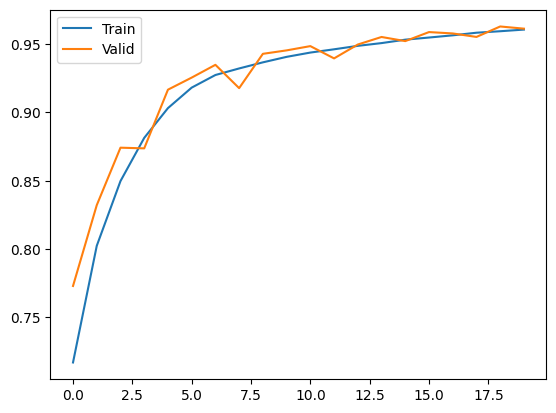

In [ ]:
plt.plot(torch.arange(n), acc_train_hist)
plt.plot(torch.arange(n), acc_valid_hist)
plt.legend(["Train", "Valid"]);

## 🟪 **Test**

In [ ]:
model = torch.load("best-model.pt")

In [ ]:
mean_acc_test = 0

with torch.no_grad():
  for x_batch, y_batch in test_loader:
    y_hat = model(x_batch)
